In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Milan['review_scores_rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: review_scores_rating
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['review_scores_rating'].max()
Min = Milan['review_scores_rating'].min()
Limites = [Min, Max]
Limites

[3.5, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.5

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.09662128575194383

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (3.5, 5.0, 16)
intervalos

array([3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7,
       4.8, 4.9, 5. ])

In [10]:
# Creamos las categorías
categorias = [
    "Muy insatisfactorio",
    "Insatisfactorio",
    "Bajo",
    "Poco aceptable",
    "Aceptable",
    "Satisfactorio",
    "Bueno",
    "Muy bueno",
    "Excelente",
    "Impresionante",
    "Maravilloso",
    "Fantástico",
    "Increíble",
    "Excepcional",
    "Perfecto"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Milan['review_scores_rating'] = pd.cut ( x = Milan ['review_scores_rating'], bins = intervalos, labels = categorias )
Milan['review_scores_rating']

0        Excepcional
1         Fantástico
2         Fantástico
3        Maravilloso
4          Aceptable
            ...     
23700    Excepcional
23701    Excepcional
23702    Excepcional
23703    Excepcional
23704    Excepcional
Name: review_scores_rating, Length: 23705, dtype: category
Categories (15, object): ['Muy insatisfactorio' < 'Insatisfactorio' < 'Bajo' < 'Poco aceptable' ... 'Fantástico' < 'Increíble' < 'Excepcional' < 'Perfecto']

In [12]:
table1 = freq_tbl(Milan['review_scores_rating'])
table1

,review_scores_rating,frequency,percentage,cumulative_perc
0,Perfecto,7348,0.309977,0.311211
1,Excepcional,7239,0.305379,0.617805
2,Increíble,2953,0.124573,0.742874
3,Fantástico,1635,0.068973,0.812121
4,Impresionante,1092,0.046066,0.858371
5,Maravilloso,1008,0.042523,0.901063
6,Aceptable,666,0.028095,0.929270
7,Excelente,660,0.027842,0.957223
8,Muy bueno,366,0.015440,0.972725
9,Bueno,296,0.012487,0.985261


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_rating,frequency
0,Perfecto,7348
1,Excepcional,7239
2,Increíble,2953
3,Fantástico,1635
4,Impresionante,1092
5,Maravilloso,1008
6,Aceptable,666
7,Excelente,660
8,Muy bueno,366
9,Bueno,296


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_rating')
Filtro_index

,frequency
review_scores_rating,
Perfecto,7348
Excepcional,7239
Increíble,2953
Fantástico,1635
Impresionante,1092
Maravilloso,1008
Aceptable,666
Excelente,660
Muy bueno,366


Text(0, 0.5, 'Frecuencia')

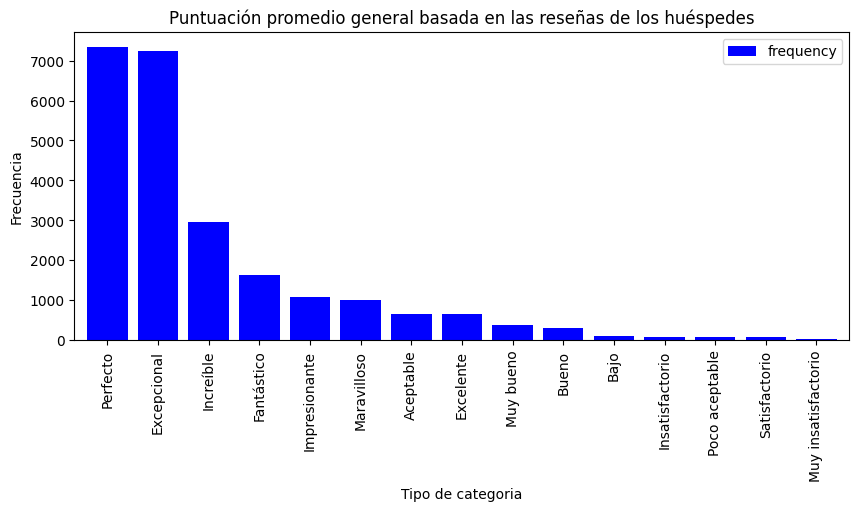

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio general basada en las reseñas de los huéspedes')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')